## Keras ConvNet Example
This example network is an update of the network from the [ipynb playground](https://github.com/julienr/ipynb_playground/blob/master/keras/convmnist/keras_cnn_mnist_v1.ipynb).  The changes are to ugrade the Keras calls to keras v2 and a tensorflow backend.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
import numpy as np
np.random.seed(1337) # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils


/Users/jdumoulin/Envs/python3notebooks/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/jdumoulin/Envs/python3notebooks/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
np.set_printoptions(precision=5, suppress=True)


In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


label :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


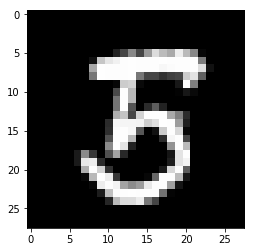

In [4]:
i = 4600
print("label : ", Y_train[i,:])
sample = X_train[i, ...]
sample.shape
pl.imshow(X_train[i,:, :, 0], interpolation='nearest', cmap=cm.gray)
pl.show()

In [5]:
model = Sequential()

convout1 = Conv2D(32, (3, 3), strides=(1, 1), padding='same', input_shape=(28, 28, 1), activation='relu')
model.add(convout1)

convout2 = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [6]:
import os
import h5py
WEIGHTS_FNAME = 'mnist_cnn_weights_v1.hdf'
if True and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    model.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 10
    model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
              verbose=1, validation_data=(X_test, Y_test))
#    model.save_weights(WEIGHTS_FNAME, overwrite=True)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.2572 - acc: 0.9219 - val_loss: 0.0631 - val_acc: 0.9813
Epoch 2/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0839 - acc: 0.9748 - val_loss: 0.0371 - val_acc: 0.9879
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0598 - acc: 0.9822 - val_loss: 0.0315 - val_acc: 0.9896
Epoch 4/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0481 - acc: 0.9860 - val_loss: 0.0348 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0403 - acc: 0.9883 - val_loss: 0.0313 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0353 - acc: 0.9893 - val_loss: 0.0291 - val_acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0296 - acc: 0.9910 - val_loss: 0.0292 - val_acc

In [14]:
np.set_printoptions(precision=3, suppress=True)
print(model.predict(X_test[1:5]))
print(Y_test[1:5])

Y_pred = model.predict(X_test)
# Convert one-hot to index
y_pred = np.argmax(Y_pred, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       1.00      1.00      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       1.00      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1132    1    0    0    1    0    0 

In [31]:
# next, we want to see an example of a mistaken number.  we can get an array of all 
#  mis-classified test items by using np.where
mis_idx = np.where(y_test != y_pred)[0]
print(mis_idx)
print(mis_idx.shape)
print(list(zip(y_test[mis_idx], y_pred[mis_idx])))

[ 247  259  321  340  445  449  582  619  659  740  882  947 1014 1039
 1112 1226 1232 1242 1260 1414 1522 1527 1530 1549 1621 1709 1790 1878
 1901 2035 2043 2118 2129 2130 2135 2293 2462 2597 2654 2896 2921 2927
 2939 2953 3060 3073 3422 3520 3558 3726 3727 3808 3941 4007 4176 4238
 4289 4571 4740 4761 4807 4814 4860 5937 5955 6091 6166 6576 6597 6625
 8408 8527 9009 9015 9019 9664 9679 9692 9729 9792]
(80,)
[(4, 6), (6, 0), (2, 7), (5, 3), (6, 0), (3, 5), (8, 2), (1, 8), (2, 1), (4, 9), (9, 7), (8, 9), (6, 5), (7, 2), (4, 6), (7, 2), (9, 4), (4, 9), (7, 1), (9, 7), (7, 9), (1, 5), (8, 7), (4, 6), (0, 6), (9, 5), (2, 7), (8, 3), (9, 4), (5, 3), (4, 8), (6, 0), (9, 8), (4, 9), (6, 1), (9, 4), (2, 0), (5, 3), (6, 1), (8, 0), (3, 2), (3, 2), (9, 5), (3, 5), (9, 7), (1, 2), (6, 0), (6, 4), (5, 0), (4, 9), (8, 9), (7, 8), (4, 6), (7, 9), (2, 7), (7, 3), (2, 7), (6, 8), (3, 5), (9, 8), (8, 0), (6, 0), (4, 9), (5, 3), (3, 8), (9, 5), (9, 3), (7, 1), (0, 7), (8, 2), (8, 6), (4, 9), (7, 2), (7

In [25]:
# Visualize a convolved image
from keras import backend as K

# K.learning_phase() is a flag that indicates if the network is in training or
# predict phase. It allow layer (e.g. Dropout) to only be applied during training
inputs = [K.learning_phase()] + model.inputs

_convout1_f = K.function(inputs, [convout1.output])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _convout1_f([0] + [X])

In [26]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

(1, 28, 28, 1)
target: 4
predicted: 6


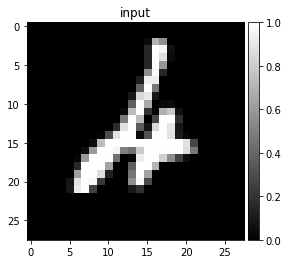

In [28]:
i = mis_idx[0]

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]
print(X.shape)
print("target: {}".format(y_test[i]))
print("predicted: {}".format(y_pred[i]))
X.reshape(28, 28)
pl.figure()
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.gray)
pl.show()

In [32]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[2]
    print(nimgs)
    imshape = imgs.shape[:2]
    print(imshape)
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[:, :,i]
    return mosaic


9
<class 'keras.layers.convolutional.Conv2D'>
W shape :  (3, 3, 32)
32
(3, 3)


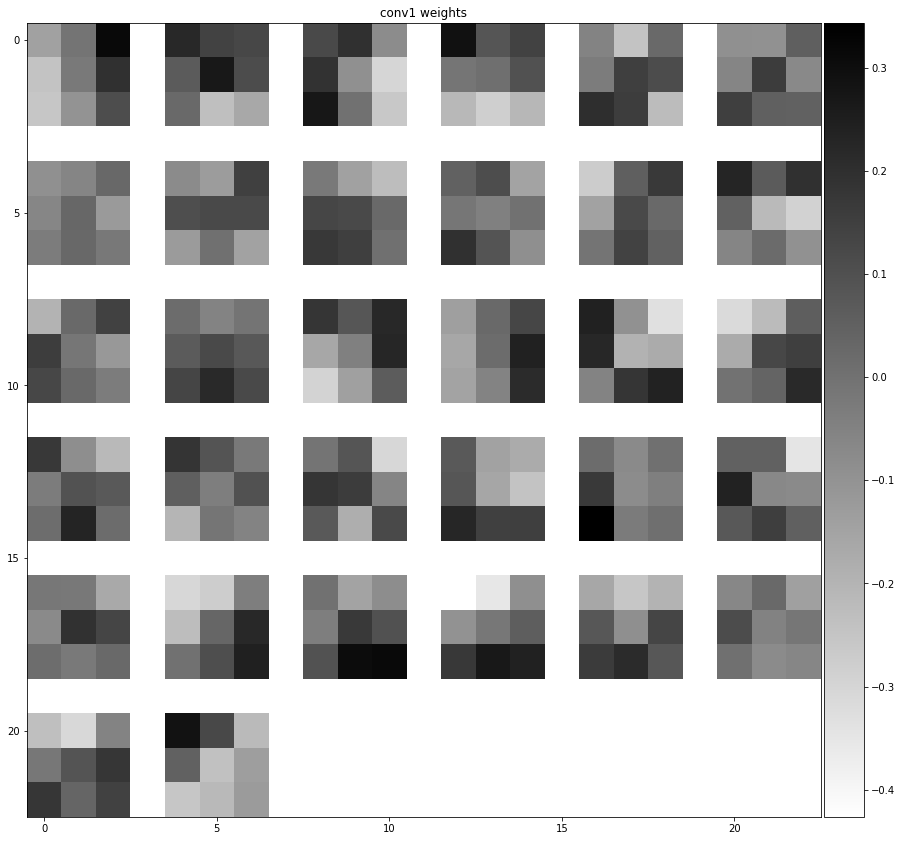

In [33]:
# Visualize weights
print(len(model.layers))
print(type(model.layers[0]))
#print(model.layers[0].get_weights()[0])
W = model.layers[0].get_weights()[0]
W = np.squeeze(W)
print("W shape : ", W.shape)

pl.figure(figsize=(15, 15))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)
pl.show()

C1 shape :  (28, 28, 32)
32
(28, 28)


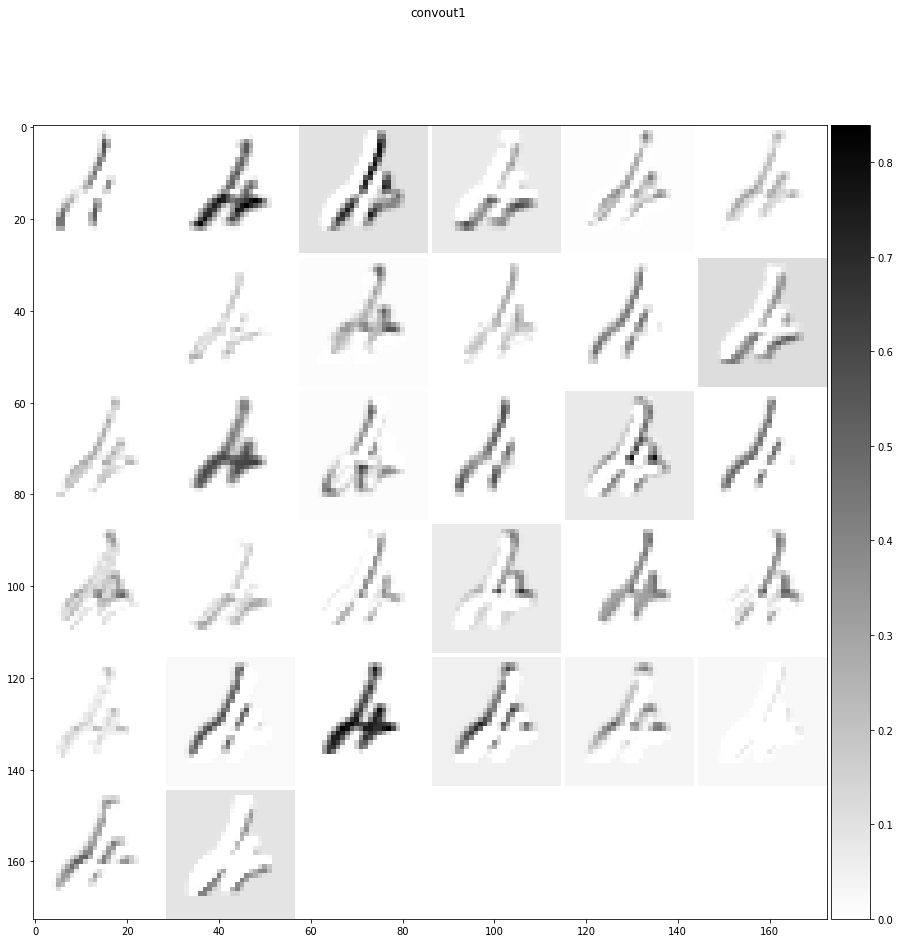

In [34]:
# Visualize convolution result (after activation)
C1 = convout1_f(X)
C1 = np.squeeze(C1)
print("C1 shape : ", C1.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout1')
nice_imshow(pl.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)
pl.show()